In [132]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def read():
    df_train= pandas.read_csv('mnist_train.csv')
    df_test= pandas.read_csv('mnist_test.csv')
    
    train= df_train.values
    test= df_test.values
    
    y_train= train[:,:1]
    y_test= test[:,:1]
    
    x_train=train[:,1:]
    x_test=test[:,1:]
    
    return x_train, y_train, x_test, y_test

X_train, y_train, X_test, y_test= read()



    

In [133]:
def appendColumn(mat):
    return np.insert(mat,0,1,axis=1)

In [134]:
def filter_data(number1, number2, mat, y):
    aux= np.squeeze(np.asarray(y))
    new_mat= mat[(aux==number1)|(aux==number2),:]
    new_y=y[(aux==number1)|(aux==number2),:]
    return new_mat, new_y

In [135]:
def scale(mat):
    y=(mat-mat.mean())/mat.mean()
    return y
    

In [136]:
def hypothesis(x, theta):
    aux= np.dot(x, np.transpose(theta))
    aux= scale(aux)
    return 1/(1+np.exp(-aux))

In [137]:
def cost(y, x,theta, lam):
    h = hypothesis(x,theta)
    return -(y*np.log(h)+(1-y)*np.log(1-h)).mean()
# +np.sum(np.power(theta,2))*lam/(2*x.shape[1])

In [138]:
def gradient_descent(x,y):
    theta=np.random.rand(1,x.shape[1])
    nr_it=50
    lam=0.1
    alfa=10000
    m=y.shape[0]
    eroare=np.zeros(nr_it)
    for i in range (0,nr_it):
        grad=np.dot(x.T,(hypothesis(x,theta)-y))
        theta=theta-(alfa*grad.T)*(1/m)
        eroare[i]=cost(y,x,theta.copy(),lam)
    return eroare,nr_it,theta

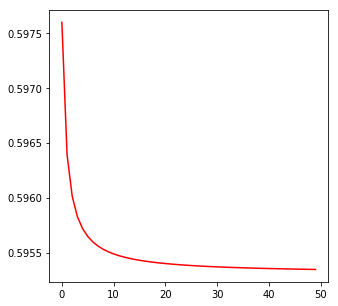

[[0.47009147]
 [0.5597106 ]
 [0.46229445]
 ...
 [0.57834633]
 [0.45543666]
 [0.37176205]] 0.8041153981294582 0.32465626904289824
y [[1]
 [2]
 [1]
 ...
 [2]
 [2]
 [1]]
[[False]
 [ True]
 [False]
 ...
 [ True]
 [False]
 [False]]
82.04724409448819
10420 12700
[[0.50662022]
 [0.39308495]
 [0.44338134]
 ...
 [0.6047119 ]
 [0.49192277]
 [0.67073764]] 0.7644520845010554 0.33381297468989946
y [[2]
 [1]
 [1]
 ...
 [2]
 [1]
 [2]]
[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]
81.81818181818181
1773 2167


In [139]:
def main():
    mat,y=filter_data(1,2,X_train,y_train)
    mat=appendColumn(mat)
    theta=np.random.rand(1,mat.shape[1])
    eroare,nr_iteratii,t=gradient_descent(mat,y)
    plt.figure(figsize=(5,5))
    plt.plot(np.arange(nr_iteratii),eroare,'red')
    plt.show()
    
    h=hypothesis(mat,t)
    print(h,np.max(h),np.min(h))
    print('y',y)
    
    aux1=h>0.5
    print(aux1)
    aux2=y==2
    contor=0
    for i in range (0,len(y)):
        if (aux1[i]==aux2[i]):
            contor+=1
    print(100*contor/(len(y)))
    
    print(contor,len(y))
    
    test,y_t=filter_data(1,2,X_test,y_test)
    test=appendColumn(test)
    
    h_test=hypothesis(test,t)
    print(h_test,np.max(h_test),np.min(h_test))
    print('y',y_t)
    
    aux1=h_test>0.5
    print(aux1)
    aux2=y_t==2
    contor=0
    for i in range (0,len(y_t)):
        if (aux1[i]==aux2[i]):
            contor+=1
    print(100*contor/(len(y_t)))
    
    print(contor,len(y_t))
    
main()